<a href="https://colab.research.google.com/github/ArthurLazdin/Machine-Learning/blob/main/Notebooks/Hotels_Bookingt_Exercise_3_inerpr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Заселится клиент или не заселится? Часть вторая.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [3]:
hotel_resrv = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine Learning/Data/Hotel Reservations.csv')


## Описание набора.
[Набор](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset) представляет собой информацию о бронировании отелей в онлайн режиме и предназначен для обучения модели-классификатора, которая будет прогнозировать заселится ли клиент или откажется от бронирования.
Набор включает следующие переменные:

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.
Целевой переменной является booking_status.


In [4]:
hotel_resrv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

В наборе нет пропусков. Это не может не радовать. Посмотрим на примерное содержимое переменных.

In [5]:
hotel_resrv.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
hotel_resrv.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


##Краткий обзор. 
Четыре переменных, включая целевую являются строковыми. Это нужно исправить. Кроме того даты предполагаемого заселения хранятся очень неудобно. Понятно, что идентификатор клиента ни на что не влияет и его можно удалить сразу.
Еще хорошо бы сократить длины названий переменных для увеличения удобства работы с данными.


In [7]:
# преобразуем целевую переменную
booking_st  = {'Canceled': 0, 'Not_Canceled': 1}
hotel_resrv['booking_status'] = hotel_resrv['booking_status'].map(booking_st)

# удалим идентификаторы
hotel_resrv.drop(['Booking_ID'], axis=1, inplace=True)

In [8]:
#преобразуем переменную room_type_reserved
room_type = hotel_resrv['room_type_reserved'].unique()
temp_list = np.arange(len(room_type))

room_tipe_dict = dict(zip(room_type, temp_list))
hotel_resrv['room_type_reserved'] = hotel_resrv['room_type_reserved'].map(room_tipe_dict)


In [9]:
segment_type = hotel_resrv['market_segment_type'].unique()
temp_list = np.arange(len(segment_type))

segment_tipe_dict = dict(zip(segment_type, temp_list))
hotel_resrv['market_segment_type'] = hotel_resrv['market_segment_type'].map(segment_tipe_dict)

In [10]:
meal_plan = hotel_resrv['type_of_meal_plan'].unique()
temp_list = np.arange(len(meal_plan))

meal_plan_dict = dict(zip(meal_plan, temp_list))
hotel_resrv['type_of_meal_plan'] = hotel_resrv['type_of_meal_plan'].map(meal_plan_dict)

## Внезапная проблема.
Для 37 строк в дататесте указано 29 февраля 2018 года, чего в природе не бывает, и соответсвующая функция datetime из модуля datetime отказывается преобразовывать тройки чисел 2018, 2, 29 в даты.

Было принято решение заменить 29 число на 28.

In [11]:
# Попытка оценить масштаб катастрофы.

dates = hotel_resrv[['arrival_year','arrival_month','arrival_date']]

error_date_list = []
for i in dates.index:
  if dates.iloc[i]['arrival_month'] == 2 and dates.iloc[i]['arrival_date'] == 29:
    dates.iloc[i]['arrival_date'] = 28
    error_date_list.append(i)
print(len(error_date_list)) 

37


In [12]:
# преобразуем дату предполагаемого заселения
dates_new=[]
for i in range(len(dates.index)):
    dates_new.append(datetime(dates.iloc[i]['arrival_year'], dates.iloc[i]['arrival_month'], dates.iloc[i]['arrival_date']))

# удаляем исходные переменные с датами "вразбивку"
hotel_resrv.drop([ 'arrival_year','arrival_month','arrival_date'], axis=1, inplace=True)

hotel_resrv.insert(7, 'booking_date',dates_new)
hotel_resrv.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,booking_date,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,2017-10-02,224,0,0,0,0,65.00,0,1
1,2,0,2,3,1,0,0,2018-11-06,5,1,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,2018-02-28,1,1,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,2018-05-20,211,1,0,0,0,100.00,0,0
4,2,0,1,1,1,0,0,2018-04-11,48,1,0,0,0,94.50,0,0


##EDA
Рассмотрим влияние значений no_of_previous_cancellations	и no_of_previous_bookings_not_canceled на принятие решения о заселении.

In [13]:
no_cancel = len(hotel_resrv[hotel_resrv['no_of_previous_bookings_not_canceled'] == 0 ])
cancel = len(hotel_resrv[hotel_resrv['no_of_previous_cancellations'] == 0 ])
total = len(hotel_resrv)
print('No cancel = ' , (no_cancel / total)*100, '%   Cancel = ', (cancel/total)*100 ,'%')

No cancel =  97.76154376292212 %   Cancel =  99.06822880771881 %


Видно, что пользы от них исчезающе мало.
Поэтому мы удалим эти столбцы из датасета.

In [14]:
hotel_resrv.drop([ 'no_of_previous_bookings_not_canceled', 'no_of_previous_cancellations'], axis=1, inplace=True)

Посиотрим что с таким признаком, как required_car_parking_space.
Судя по графику ниже он важен. Оставляем. 

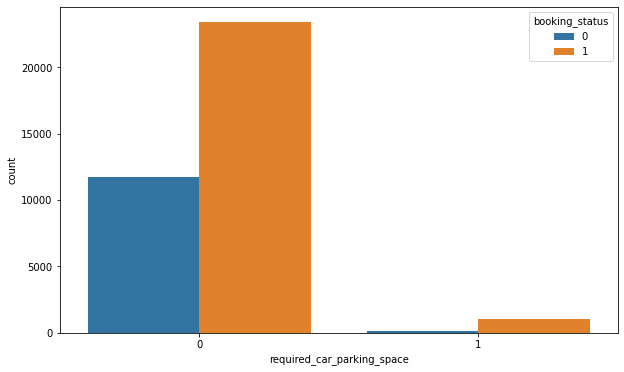

In [15]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'required_car_parking_space', hue = 'booking_status', data = hotel_resrv)

Попробуем разобраться с ценой комнаты. Это, изначально, едиственная существенная количественная характеристика. Причем ее значения сильно превышают значения остальных переменных, что предполагает нормализацию этой переменной.
Но это имеет смысл делать после разделения данных на тренировочный и тестовый наборы.

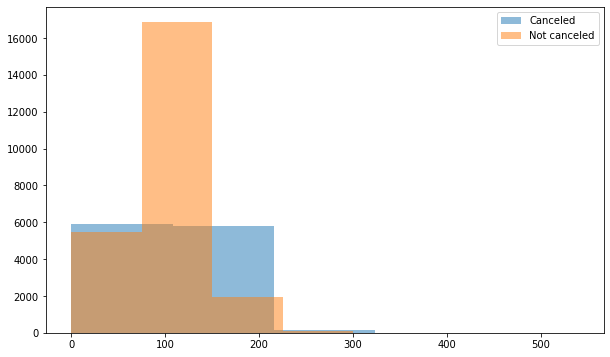

In [16]:
# задаем количество интервалов
bins = 5
 
# и размер графика
plt.figure(figsize = (10,6))
 

plt.hist(hotel_resrv.loc[hotel_resrv['booking_status'] == 0, 'avg_price_per_room'], bins, alpha = 0.5, label = 'Canceled')
plt.hist(hotel_resrv.loc[hotel_resrv['booking_status'] == 1, 'avg_price_per_room'], bins, alpha = 0.5, label = 'Not canceled')
plt.legend(loc = 'upper right')

 

Данные по цене имеет смысл оставить.
Займемся анализом вркменных интервалов. 
Посмотрим (plotly нам в помощь) на временные соотношения отказов и подтверждений бронирования. 

### Построим корреляционную матрицу.
Интересно, хотя и не неожиданно, что два самых коррелируемых значения - это число детей и число комнат. 


In [36]:
import plotly.figure_factory as ff
corrs = hotel_resrv.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

Оставим данные о количестве забронированных ночей, как есть. 

Что делать с датами непонятно. Может быть их в дни недели преобразовать? 

А пока удалим данные о датах. Потому что они не числа. И модель на них не обучить. 

In [18]:
hotel_resrv.drop(['booking_date'], axis=1, inplace=True)


# Строим модель.

In [19]:
feature_names = list(hotel_resrv).copy()
feature_names.remove('booking_status')

# выделчем отдельно целевую переменную
target = hotel_resrv['booking_status']

# создаем датасет из выбранных переменных кроме целевой
temp_hotel_res = hotel_resrv
temp_hotel_res.drop(['booking_status'], axis=1, inplace=True)

X = pd.DataFrame(temp_hotel_res, columns = feature_names) 
y = target


In [20]:
from sklearn.model_selection import train_test_split

#Создаем три набора данных: тренировочный, тестовый и валидационный. В пропорции 60:20:20.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.4, 
                                                    random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,
                                                test_size=0.5, 
                                                random_state=42)


### Нормализуем данные.
Каждый датасет нормализуем по-отдельности, чтобы не переносить усреднения из набора в набор.

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_temp = scaler.fit_transform(X_train).copy()  #fit_tranform для тренировочного набора
X_train = pd.DataFrame(scaled_temp, columns = feature_names) 

scaled_temp = scaler.transform(X_test).copy()   #для валидационного и тестирующего transorm
X_test = pd.DataFrame(scaled_temp, columns = feature_names) 

scaled_temp = scaler.transform(X_val).copy()
X_val = pd.DataFrame(scaled_temp, columns = feature_names) 

X_test.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests
0,0.303261,-0.261706,-0.934280,-0.863962,-0.512415,-0.180672,-0.434617,-0.785828,0.297857,-0.160862,0.017099,-0.786427
1,-1.627266,-0.261706,-0.934280,-0.863962,-0.512415,-0.180672,0.856949,-0.960363,3.373941,-0.160862,-0.239396,-0.786427
2,-1.627266,-0.261706,0.220636,-0.143442,-0.512415,-0.180672,-0.434617,-0.960363,1.835899,-0.160862,-0.695386,-0.786427
3,0.303261,-0.261706,0.220636,-0.143442,1.056843,-0.180672,-0.434617,-0.076054,0.297857,-0.160862,-0.689687,1.759357
4,-1.627266,-0.261706,2.530468,3.459158,-0.512415,-0.180672,-0.434617,-0.867278,0.297857,-0.160862,-0.754380,0.486465


## Выбор модели
В качестве модели выберем случайный лес. Он же Random Forest. 
В Интернете у него хорошая репутация.

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error


## Кросс-валидация.
Для предыдущего задания была выбрана модель на основе метода логистической регрессии. Сравним ее с методом случайного леса.

In [23]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state = 42)
scores1 = cross_val_score(model1, X_train, y_train.values.ravel(), cv=5)
print('Logistic Regression',scores1)

model = RandomForestClassifier(random_state = 42)
scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5)
print('Random Forest',scores)



Logistic Regression [0.79600276 0.77670572 0.78704342 0.79186768 0.78313807]
Random Forest [0.88490696 0.87847462 0.87939352 0.8835286  0.87089364]


Видно, что метод случайного леса работает явно лучше. На нем и остановимся

## Настройка гиперпараметров.

In [24]:
%%time
model = RandomForestClassifier(random_state = 42) # фиксируем состояние для повторяемости

hyperparams = {
    'n_estimators': np.arange(20,160,20),
    'max_depth': list(np.arange(8,36,4)) + [None]
}

cross_val = GridSearchCV(model, hyperparams, cv=5)
cross_val.fit(X_train, y_train.values.ravel())


CPU times: user 6min 13s, sys: 1.34 s, total: 6min 14s
Wall time: 6min 29s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [8, 12, 16, 20, 24, 28, 32, None],
                         'n_estimators': array([ 20,  40,  60,  80, 100, 120, 140])})

Ладно. Гиперпараметры настроились, но как именно не видно.
Чтобы заглянуть "внутрь" настройки гиперпараметров нужно написать функцию. Ничем кроме вывода она заниматься не будет.

In [25]:
def cross_val_results(results):
  print('Оптимальные гиперпараметры: {}\n'.format(results.best_params_))
  means = results.cv_results_['mean_test_score']
  stds = results.cv_results_['std_test_score']

  for mean, std, params in zip(means, stds, results.cv_results_['params']):
    print('Mean {} Standard Deviation {} Hyperparameters {}'.format(round(mean,7), round(std, 5), params))

In [26]:
cross_val_results(cross_val)

Оптимальные гиперпараметры: {'max_depth': 20, 'n_estimators': 40}

Mean 0.8450724 Standard Deviation 0.00385 Hyperparameters {'max_depth': 8, 'n_estimators': 20}
Mean 0.8465886 Standard Deviation 0.0021 Hyperparameters {'max_depth': 8, 'n_estimators': 40}
Mean 0.8461751 Standard Deviation 0.00269 Hyperparameters {'max_depth': 8, 'n_estimators': 60}
Mean 0.8467723 Standard Deviation 0.00141 Hyperparameters {'max_depth': 8, 'n_estimators': 80}
Mean 0.8469102 Standard Deviation 0.00123 Hyperparameters {'max_depth': 8, 'n_estimators': 100}
Mean 0.8473237 Standard Deviation 0.0031 Hyperparameters {'max_depth': 8, 'n_estimators': 120}
Mean 0.8475994 Standard Deviation 0.00374 Hyperparameters {'max_depth': 8, 'n_estimators': 140}
Mean 0.8692856 Standard Deviation 0.00373 Hyperparameters {'max_depth': 12, 'n_estimators': 20}
Mean 0.870572 Standard Deviation 0.00343 Hyperparameters {'max_depth': 12, 'n_estimators': 40}
Mean 0.8716747 Standard Deviation 0.00383 Hyperparameters {'max_depth': 12, 

Для чистоты эксперимента создадим две модели. Одну с оптимальными гиперпараметрами, а вторую с, например, значениями max_depth': 8, 'n_estimators': 25.

In [27]:
%%time
model_opt = RandomForestClassifier(n_estimators = 40, max_depth = 20, random_state = 42)
model_opt.fit(X_train, y_train.values.ravel())


CPU times: user 736 ms, sys: 3 ms, total: 739 ms
Wall time: 746 ms


RandomForestClassifier(max_depth=20, n_estimators=40, random_state=42)

In [28]:
%%time
model_easy = RandomForestClassifier(n_estimators = 20, max_depth = 12, random_state = 42)
model_easy.fit(X_train, y_train.values.ravel())

CPU times: user 448 ms, sys: 4.02 ms, total: 452 ms
Wall time: 486 ms


RandomForestClassifier(max_depth=12, n_estimators=20, random_state=42)

Более простая модель ожидаемо "учится быстрее". 

## Оценим модели. 
И работу моделей на валидационных наборах.

In [29]:
for mdl in [model_easy, model_opt]: # в принципе можно сравнивать и больше двух моделей
  y_pred = mdl.predict(X_val)
  accuracy = round(accuracy_score(y_val, y_pred), 4)
  precision = round(precision_score(y_val, y_pred), 4)
  recall = round(recall_score(y_val, y_pred), 4)

  print('Max Depth: {} || Estimators: {} || Accuracy: {} || Precision: {} || Recall: {}'.format(mdl.max_depth,
                                                                                                mdl.n_estimators,
                                                                                                accuracy,
                                                                                                precision,
                                                                                                recall))
  print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')
                                                                                            
  

Max Depth: 12 || Estimators: 20 || Accuracy: 0.8703 || Precision: 0.8801 || Recall: 0.9324
RMSE: 0.6596576185214029
Max Depth: 20 || Estimators: 40 || Accuracy: 0.8834 || Precision: 0.8959 || Recall: 0.9334
RMSE: 0.6580886217261972


Теперь запустим модель (которая оптимальная) на тестовом наборе. 

In [30]:
y_pred = model_opt.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred), 6)
precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)

print('Max Depth: {} || Estimators: {} || Accuracy: {} || Precision: {} || Recall: {}'.format(model_opt.max_depth,
                                                                                                model_opt.n_estimators,
                                                                                                accuracy,
                                                                                                precision,
                                                                                                recall))

print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')


Max Depth: 20 || Estimators: 40 || Accuracy: 0.890834 || Precision: 0.901 || Recall: 0.943
RMSE: 0.33040292424569034


In [31]:
from sklearn.metrics import confusion_matrix
model_matrix = confusion_matrix(y_test, y_pred, labels = [1,0])
#вспомним матрицу ошибок и выведем ее
# для удобства создадим датафрейм
model_matrix_df = pd.DataFrame(model_matrix)
print(model_matrix_df)

      0     1
0  4627   281
1   511  1836


# Интерпретация модели.


<Figure size 720x720 with 0 Axes>

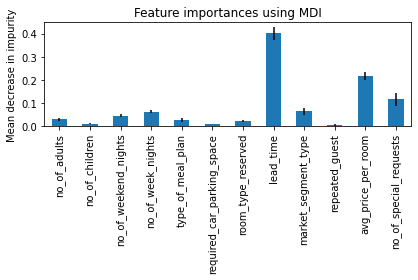

In [34]:
forest_importances = pd.Series(model_opt.feature_importances_, index=X_train.columns)


fig, ax = plt.subplots()
std = np.std([tree.feature_importances_ for tree in model_opt.estimators_], axis=0)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity", )
fig.tight_layout()

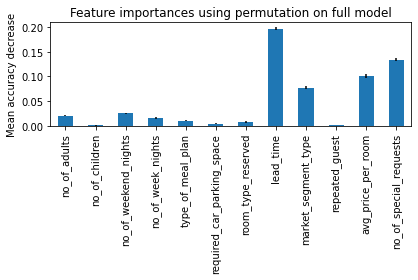

In [35]:

from sklearn.inspection import permutation_importance
importances = permutation_importance(model_opt, X_test, y_test, n_repeats=10, random_state=2023, n_jobs=2)
forest_importances = pd.Series(importances.importances_mean, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=importances.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

В обоих вариантах интерпретации чётко выделяются четыре признака: средняя цена заселения, сегмент рынка бронирования(онлайн или офлайн бронирование, бронирование, связанное с авиаперелетом и пр.) и количество специальных запросов. С последним всё достаточно понятно, т. к. чем тщательние клиент подходит к бронированию, то тем меньше вероятность отказа. 
Самой большой неожиданностью, впрочем еще на этапе отбора признаков, столо то, что наиболее значимой характеристикой является срок между датой бронирования и датой заселения.

Является ли это общей закономерностью или особенностью данного датасета - трудно сказать. Возможно сравнение с другими наборами данных позволило бы оценить валидность обработанного.

Честно говоря мне казалось, что количество детей должно было бы быть очень значимым параметром: чем детей больше тем меньше вероятность того, что они все одновременно здоровы, и тем выше вероятность отказа. Но оказывается, что такой параметр, как количество взрослых - более важен.



# Выводы.
Во-первых, я получил море удовольствия от изучения всей этой кухни с обучением моделей. Хотя с pandas сначала были проблемы. 

Во-вторых, метод случайного леса позволяет строить модели лучше, чем при использовании метода логистической регрессии.

В-третьих, я понял, что CoLab это очень удобный итструмент. Например, запомнить сайт, который пригодился, можно прямо в ячейке, причем ссылкой с удобочитаемой подписью!